In [1]:
import os
import csv
from PIL import Image

# Path to your dataset directory
dataset_dir = "C:\\Dataset"

# Path to the CSV file you want to create
csv_file = "C:\\Dataset\\datasetcsv.csv"

# Function to iterate through the dataset directory
def create_csv(dataset_dir, csv_file):
    with open(csv_file, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['image_path', 'label'])  # Write header

        # Iterate through subfolders (categories)
        for category in os.listdir(dataset_dir):
            category_path = os.path.join(dataset_dir, category)
            
            # Check if it's a directory
            if os.path.isdir(category_path):
                # Iterate through images in the subfolder
                for image_file in os.listdir(category_path):
                    if image_file.endswith('.jpg') or image_file.endswith('.png'):  # Assuming image files are jpg or png
                        image_path = os.path.join(category_path, image_file)
                        csvwriter.writerow([image_path, category])  # Write image path and corresponding label to CSV

# Call the function to create the CSV file
create_csv(dataset_dir, csv_file)

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("C:\\Dataset\\datasetcsv.csv")

In [3]:
data

,image_path,label
0,C:\Dataset\cloud\train_10021.jpg,cloud
1,C:\Dataset\cloud\train_10043.jpg,cloud
2,C:\Dataset\cloud\train_10070.jpg,cloud
3,C:\Dataset\cloud\train_10081.jpg,cloud
4,C:\Dataset\cloud\train_10096.jpg,cloud
...,...,...
37197,C:\Dataset\sea\SeaLake_995.jpg,sea
37198,C:\Dataset\sea\SeaLake_996.jpg,sea
37199,C:\Dataset\sea\SeaLake_997.jpg,sea
37200,C:\Dataset\sea\SeaLake_998.jpg,sea


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37202 entries, 0 to 37201
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  37202 non-null  object
 1   label       37202 non-null  object
dtypes: object(2)
memory usage: 581.4+ KB


In [5]:
data.head()

,image_path,label
0,C:\Dataset\cloud\train_10021.jpg,cloud
1,C:\Dataset\cloud\train_10043.jpg,cloud
2,C:\Dataset\cloud\train_10070.jpg,cloud
3,C:\Dataset\cloud\train_10081.jpg,cloud
4,C:\Dataset\cloud\train_10096.jpg,cloud


In [6]:
data.tail()

,image_path,label
37197,C:\Dataset\sea\SeaLake_995.jpg,sea
37198,C:\Dataset\sea\SeaLake_996.jpg,sea
37199,C:\Dataset\sea\SeaLake_997.jpg,sea
37200,C:\Dataset\sea\SeaLake_998.jpg,sea
37201,C:\Dataset\sea\SeaLake_999.jpg,sea


In [7]:
data.describe()

,image_path,label
count,37202,37202
unique,37202,7
top,C:\Dataset\cloud\train_10021.jpg,forest
freq,1,10012


<function matplotlib.pyplot.show(close=None, block=None)>

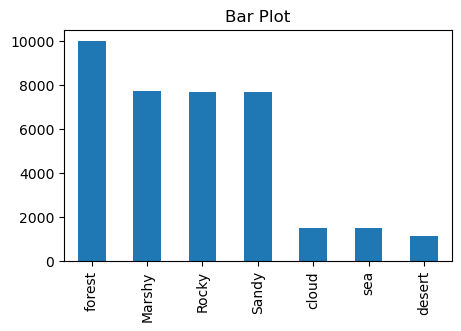

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame
data = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Suppose 'column_name' is the column you want to visualize
column_name = 'label'

# Create a bar plot
data[column_name].value_counts().plot(kind='bar', figsize=(5, 3), title='Bar Plot')
plt.show

In [9]:
import cv2
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = [] 
for index, row in dataset.iterrows(): 
    image_path = row['image_path'] 
    label = row['label'] 
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label)) 

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = svm_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8442413654078753


Validation Accuracy: 0.8442413654078753
Confusion Matrix:
[[1133  231   13    4    1  112    4]
 [ 108 1191   94   11    1  104    4]
 [   1   99 1456    0    4    1    0]
 [  14   19   26  238    3    7    1]
 [   0    7   31    1  186    0    0]
 [ 119   47    0    4    0 1859   18]
 [  16    3    0    2    0   49  219]]


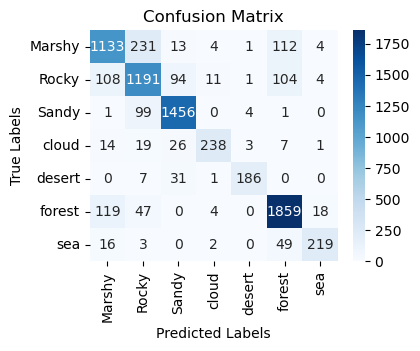

In [44]:
import cv2
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = []
for index, row in dataset.iterrows():
    image_path = row['image_path']
    label = row['label']
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label))

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = svm_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can use seaborn to plot the confusion matrix

# Create a dataframe for the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
import cv2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = []
for index, row in dataset.iterrows():
    image_path = row['image_path']
    label = row['label']
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label))

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = dt_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.8711194731890874


Validation Accuracy: 0.8724633785781482
Confusion Matrix:
[[1230  147   14    9    4   90    4]
 [ 123 1273   47   10    2   57    1]
 [  15   64 1455    9   15    3    0]
 [  19    9   14  259    2    4    1]
 [   0    2   18    3  200    1    1]
 [ 126   35    2    3    1 1843   37]
 [  13    2    1    1    1   39  232]]


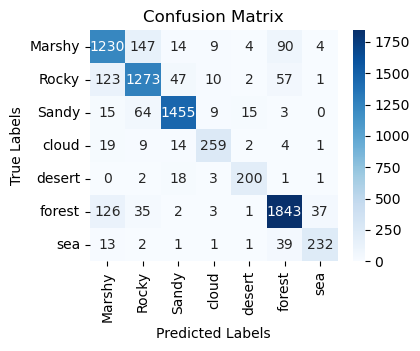

In [45]:
import cv2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = []
for index, row in dataset.iterrows():
    image_path = row['image_path']
    label = row['label']
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label))

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = dt_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can use seaborn to plot the confusion matrix

# Create a dataframe for the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [12]:
import cv2
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = []
for index, row in dataset.iterrows():
    image_path = row['image_path']
    label = row['label']
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label))

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9364332750974331


Validation Accuracy: 0.9364332750974331
Confusion Matrix:
[[1335  103    9    2    1   45    3]
 [  46 1403   21    3    0   37    3]
 [   0   55 1504    0    2    0    0]
 [  11    9   17  270    0    1    0]
 [   0    1   13    0  211    0    0]
 [  35   11    0    0    0 1991   10]
 [  10    0    0    1    0   24  254]]


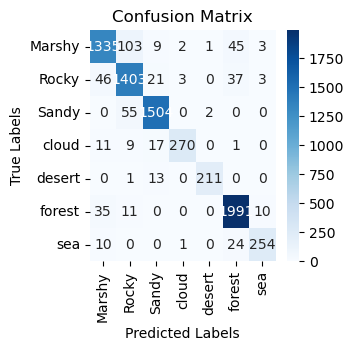

In [46]:
import cv2
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = []
for index, row in dataset.iterrows():
    image_path = row['image_path']
    label = row['label']
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label))

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can use seaborn to plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe for the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Validation Accuracy: 0.9193656766563634
Confusion Matrix:
[[1291  123    5    5    2   69    3]
 [  70 1386   15    0    0   42    0]
 [   5   51 1501    1    3    0    0]
 [  16   19   14  249    5    5    0]
 [   0    3   14    1  207    0    0]
 [  46   23    0    0    0 1962   16]
 [  12    2    0    0    0   30  245]]


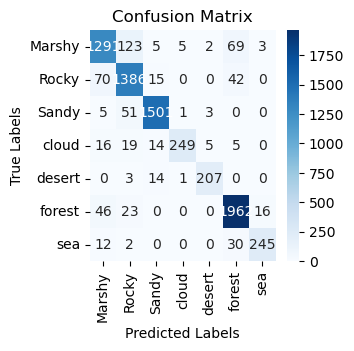

In [49]:
import cv2
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = []
for index, row in dataset.iterrows():
    image_path = row['image_path']
    label = row['label']
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label))

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = knn_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can use seaborn to plot the confusion matrix

# Create a dataframe for the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))

# Plot the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Validation Accuracy for k=1: 0.9178873807283967
Validation Accuracy for k=2: 0.913990055100121
Validation Accuracy for k=3: 0.9216503158177665
Validation Accuracy for k=4: 0.9178873807283967
Validation Accuracy for k=5: 0.9193656766563634
Validation Accuracy for k=6: 0.9168122564171483
Validation Accuracy for k=7: 0.9168122564171483
Validation Accuracy for k=8: 0.9123773686332483
Validation Accuracy for k=9: 0.91197419701653
Validation Accuracy for k=10: 0.9079424808493483
Validation Accuracy for k=11: 0.9082112619271603
Validation Accuracy for k=12: 0.9057922322268512
Validation Accuracy for k=13: 0.9055234511490391
Validation Accuracy for k=14: 0.9028356403709179
Validation Accuracy for k=15: 0.9037763741432603
Validation Accuracy for k=16: 0.9010885633651391
Validation Accuracy for k=17: 0.9006853917484209
Validation Accuracy for k=18: 0.8990727052815481
Validation Accuracy for k=19: 0.8978631904313936
Validation Accuracy for k=20: 0.8955785512699906


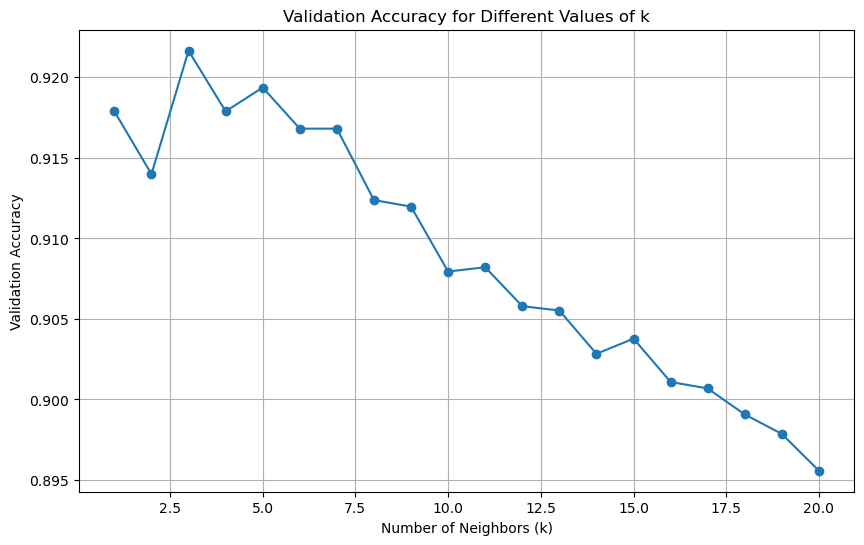

Confusion Matrix for k=3:
[[1309  114    5    4    2   62    2]
 [  72 1384   18    2    0   37    0]
 [   6   48 1497    4    6    0    0]
 [  16   19   13  253    3    4    0]
 [   1    2   14    1  207    0    0]
 [  45   25    0    1    0 1957   19]
 [   7    1    0    0    0   30  251]]


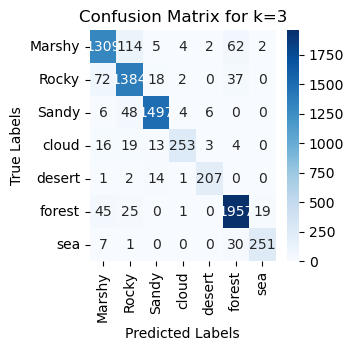

In [47]:
import cv2
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = []
for index, row in dataset.iterrows():
    image_path = row['image_path']
    label = row['label']
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label))

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracies for different values of k
k_values = range(1, 21)
accuracies = []

# Loop through different values of k
for k in k_values:
    # Initialize KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn_classifier.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = knn_classifier.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

    # Print accuracy for each k
    print(f"Validation Accuracy for k={k}:", accuracy)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Values of k')
plt.grid(True)
plt.show()

# Use the best k value (with highest accuracy) for confusion matrix
best_k = k_values[np.argmax(accuracies)]
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)
best_y_pred = best_knn_classifier.predict(X_val)

# Calculate confusion matrix for the best k
conf_matrix = confusion_matrix(y_val, best_y_pred)

# Print the confusion matrix
print(f"Confusion Matrix for k={best_k}:")
print(conf_matrix)

# Create a dataframe for the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for k={best_k}')
plt.show()


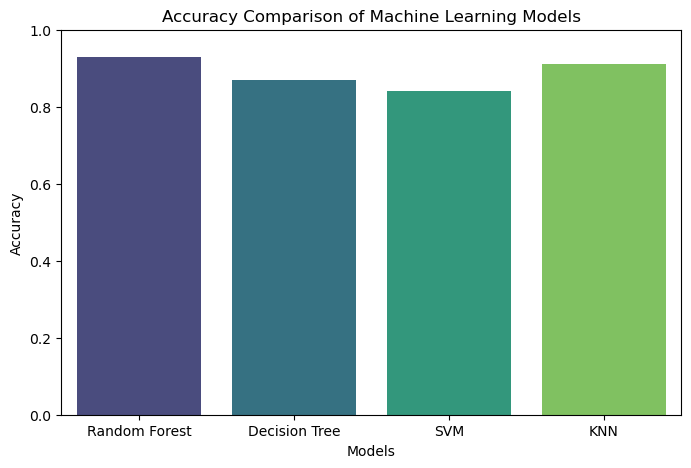

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy scores for each model
models = ['Random Forest', 'Decision Tree', 'SVM', 'KNN']
accuracy_scores = [0.93, 0.87, 0.84, 0.91]  # Replace these values with your actual accuracy scores

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.show()


Validation Accuracy: 0.9364332750974331
Confusion Matrix:
[[1335  103    9    2    1   45    3]
 [  46 1403   21    3    0   37    3]
 [   0   55 1504    0    2    0    0]
 [  11    9   17  270    0    1    0]
 [   0    1   13    0  211    0    0]
 [  35   11    0    0    0 1991   10]
 [  10    0    0    1    0   24  254]]


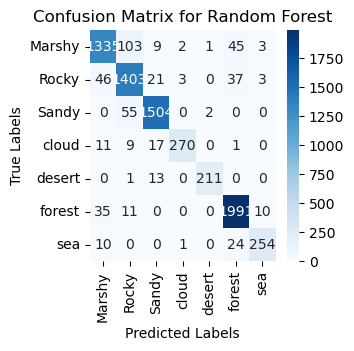

In [48]:
import cv2
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = []
for index, row in dataset.iterrows():
    image_path = row['image_path']
    label = row['label']
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label))

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a dataframe for the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))

# Plot the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()


Validation Accuracy for n_estimators=1: 0.8390001343905389
Validation Accuracy for n_estimators=2: 0.8380594006181965
Validation Accuracy for n_estimators=3: 0.8849616986964117
Validation Accuracy for n_estimators=4: 0.8896653675581239
Validation Accuracy for n_estimators=5: 0.8998790485149846
Validation Accuracy for n_estimators=6: 0.9061954038435694
Validation Accuracy for n_estimators=7: 0.9113022443219997
Validation Accuracy for n_estimators=8: 0.9129149307888724
Validation Accuracy for n_estimators=9: 0.9156027415669937


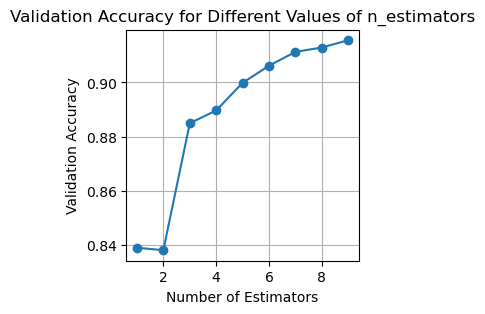

In [50]:
import cv2
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
        return None
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Calculate the histogram for the Hue channel
    hue_hist = cv2.calcHist([hsv], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    hue_hist = cv2.normalize(hue_hist, hue_hist).flatten()
    
    return hue_hist

# Load the dataset
dataset = pd.read_csv("C:\\Dataset\\datasetcsv.csv")

# Extract features for each image
features = []
for index, row in dataset.iterrows():
    image_path = row['image_path']
    label = row['label']
    image_features = extract_features(image_path)
    if image_features is not None:
        features.append((image_features, label))

# Split features and labels
X = [f[0] for f in features]
y = [f[1] for f in features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracies for different values of n_estimators
n_estimators_values = range(1, 10)
accuracies = []

# Loop through different values of n_estimators
for n_estimators in n_estimators_values:
    # Initialize Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = rf_classifier.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

    # Print accuracy for each n_estimators
    print(f"Validation Accuracy for n_estimators={n_estimators}:", accuracy)

# Plot the accuracies
plt.figure(figsize=(3, 3))
plt.plot(n_estimators_values, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Values of n_estimators')
plt.grid(True)
plt.show()


In [23]:
# Preprocess and extract features from new satellite images
new_image_paths = ["C:\\Users\\T.YAMINI\\Downloads\\Image1.jpg"]
new_features = []
for image_path in new_image_paths:
    image_features = extract_features(image_path)
    if image_features is not None:
        new_features.append(image_features)
        print(f"Features extracted for {image_path}")

# Use the trained model to predict labels for new data
new_predictions = rf_classifier.predict(new_features)
print("Predictions for new data:", new_predictions)

# Optionally, if ground truth labels are available, evaluate the predictions
# new_ground_truth_labels = [true_label1, true_label2, ...]
# new_accuracy = accuracy_score(new_ground_truth_labels, new_predictions)
# print("Accuracy on new data:", new_accuracy)

Features extracted for C:\Users\T.YAMINI\Downloads\Image1.jpg
Predictions for new data: ['desert']


In [28]:
# Preprocess and extract features from new satellite images
new_image_paths = ["C:\\Users\\T.YAMINI\\Downloads\\image-3.jpg"]
new_features = []
for image_path in new_image_paths:
    image_features = extract_features(image_path)
    if image_features is not None:
        new_features.append(image_features)
        print(f"Features extracted for {image_path}")

# Use the trained model to predict labels for new data
new_predictions = rf_classifier.predict(new_features)
print("Predictions for new data:", new_predictions)

# Optionally, if ground truth labels are available, evaluate the predictions
# new_ground_truth_labels = [true_label1, true_label2, ...]
# new_accuracy = accuracy_score(new_ground_truth_labels, new_predictions)
# print("Accuracy on new data:", new_accuracy)

Features extracted for C:\Users\T.YAMINI\Downloads\image-3.jpg
Predictions for new data: ['Rocky']


In [32]:
# Preprocess and extract features from new satellite images
new_image_paths = ["C:\\Users\\T.YAMINI\\Downloads\\images10.jpeg"]
new_features = []
for image_path in new_image_paths:
    image_features = extract_features(image_path)
    if image_features is not None:
        new_features.append(image_features)
        print(f"Features extracted for {image_path}")

# Use the trained model to predict labels for new data
new_predictions = rf_classifier.predict(new_features)
print("Predictions for new data:", new_predictions)

# Optionally, if ground truth labels are available, evaluate the predictions
# new_ground_truth_labels = [true_label1, true_label2, ...]
# new_accuracy = accuracy_score(new_ground_truth_labels, new_predictions)
# print("Accuracy on new data:", new_accuracy)

Features extracted for C:\Users\T.YAMINI\Downloads\images10.jpeg
Predictions for new data: ['Marshy']


In [39]:
# Preprocess and extract features from new satellite images
new_image_paths = ["C:\\Users\\T.YAMINI\\OneDrive\\Pictures\\image50.jpg"]
new_features = []
for image_path in new_image_paths:
    image_features = extract_features(image_path)
    if image_features is not None:
        new_features.append(image_features)
        print(f"Features extracted for {image_path}")

# Use the trained model to predict labels for new data
new_predictions = rf_classifier.predict(new_features)
print("Predictions for new data:", new_predictions)

# Optionally, if ground truth labels are available, evaluate the predictions
# new_ground_truth_labels = [true_label1, true_label2, ...]
# new_accuracy = accuracy_score(new_ground_truth_labels, new_predictions)
# print("Accuracy on new data:", new_accuracy)

Features extracted for C:\Users\T.YAMINI\OneDrive\Pictures\image50.jpg
Predictions for new data: ['forest']


In [54]:
# Preprocess and extract features from new satellite images
new_image_paths = ["C:\\Users\\T.YAMINI\\OneDrive\\Pictures\\image300.jpg"]
new_features = []
for image_path in new_image_paths:
    image_features = extract_features(image_path)
    if image_features is not None:
        new_features.append(image_features)
        print(f"Features extracted for {image_path}")

# Use the trained model to predict labels for new data
new_predictions = rf_classifier.predict(new_features)
print("Predictions for new data:", new_predictions)

# Optionally, if ground truth labels are available, evaluate the predictions
# new_ground_truth_labels = [true_label1, true_label2, ...]
# new_accuracy = accuracy_score(new_ground_truth_labels, new_predictions)
# print("Accuracy on new data:", new_accuracy)

Features extracted for C:\Users\T.YAMINI\OneDrive\Pictures\image300.jpg
Predictions for new data: ['Sandy']
